# Computational Methods in Economics

## Tutorial 2d - Pandas

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2018-11-06 11:08:11.430069


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## This Lecture

- [Introduction](#intro)
- [Pandas Series](#ser)
- [Pandas DataFrames](#df)
- [Running Regressions: Statsmodel](#stats)

--------------------------------------------------------------------------------------------------------------------------------

## Introduction

Pandas is by far the most popular package when doing data analysis in Python. While it is not mandatory for this course, it is highly recommend to spend some time on it if you plan to use Python for working with data.

We import Pandas in the following way:

In [3]:
import pandas as pd

Pandas' main object types are *series* and *dataframes*. They are based on one- and two-dimensional Numpy arrays, respectively. The main difference is that rows and (in the case of multidimensional dataframes) columns have key names that refer to the them, similar to dictionaries. To use an analogy from outside of Python, you can think of series and dataframes as spreadsheets, like used in Excel. 

----------------------------------------------------------------------------------------------------------------------
<a id = "ser"></a>

## Pandas Series

A Pandas series is an one-dimensional array containing data. You can think of it as a dictionary, put in an array, as the following example will show. Start with a dictionary that has integers (here years) as keys and strings (here the name of the Bundesliga champion in that year since 2007) as values.

In [4]:
D = {2007: 'VfB Stuttgart', 2008: 'FC Bayern', 2009: 'VfL Wolfsburg', 2010: 'FC Bayern', \
     2011: 'Borussia Dortmund', 2012: 'Borussia Dortmund', 2013: 'FC Bayern', \
     2014: 'FC Bayern', 2015: 'FC Bayern', 2016: 'FC Bayern', 2017: 'FC Bayern', 2018: 'FC Bayern'}

We can use the Pandas **Series** function to convert this dictionary into a Pandas series:

In [5]:
ts = pd.Series(D)
print(type(ts))

<class 'pandas.core.series.Series'>


In [6]:
print(ts)

2007        VfB Stuttgart
2008            FC Bayern
2009        VfL Wolfsburg
2010            FC Bayern
2011    Borussia Dortmund
2012    Borussia Dortmund
2013            FC Bayern
2014            FC Bayern
2015            FC Bayern
2016            FC Bayern
2017            FC Bayern
2018            FC Bayern
dtype: object


This *looks* like an array with two columns; however, we can use the **shape** method (that we have seen in the context of Numpy arrays) to verify that this is a one-dimensional array:

In [7]:
print(ts.shape)

(12,)


In fact, only the second column that you see above is treated as data. The first column are the *indices*, i.e. the keys that refer to the rows. We can also see this by applying the **index** attribute on our **ts** series. This will return the row indices as special type of array:

In [8]:
print(ts.index)

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018],
           dtype='int64')


Exactly as with dictionaries, we can use the indices in a bracket operator to access an element in the series:

In [9]:
print(ts[2010])
## for comparison, the same notation works for a dictionary
print(D[2010])

FC Bayern
FC Bayern


Alternatively, you can also use the **loc** method. This is particularly important in the context of dataframes (see below):

In [10]:
print(ts.loc[2010])

FC Bayern


The important difference between a Pandas series and a dictionary is that the elements in a series are *ordered*, i.e. there is a first element, a second element etc. This is illustrated by the fact that you can also access elements *by its position* rather than by its (row) index. For example, we can check the first element of the series *without using the index of the first row*, using the **iloc** method:

In [11]:
print(ts.iloc[0])
## the following would not work:
# print(ts[0])

VfB Stuttgart


Moreover, the ordering of elements also implies that you can access multiple adjacent elements, using either **loc** or **iloc**: 

In [12]:
print(ts.loc[2010:2012])

2010            FC Bayern
2011    Borussia Dortmund
2012    Borussia Dortmund
dtype: object


In [13]:
print(ts.iloc[:-1:2])

2007        VfB Stuttgart
2009        VfL Wolfsburg
2011    Borussia Dortmund
2013            FC Bayern
2015            FC Bayern
2017            FC Bayern
dtype: object


Above, we have used a dictionary to define a Pandas series. We can also use the **Series** function on a list (or tuple). Since in this case, we don't provide any row indices, Pandas automatically uses integers as indices, starting at 0.

In [14]:
## define list
lst = [x**2 for x in range(1, 11)]
print(lst)
print()
## convert to series
ts2 = pd.Series(lst)
print(ts2)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

0      1
1      4
2      9
3     16
4     25
5     36
6     49
7     64
8     81
9    100
dtype: int64


In [15]:
print(ts2.index)

RangeIndex(start=0, stop=10, step=1)


Note that in this special case, the indices and the positions of the elements in the series are identical, hence we could use **loc** and **iloc** (almost) in the same way.

In [16]:
print( ts2.loc[1:3] )
print( ts2.iloc[1:3] )

1     4
2     9
3    16
dtype: int64
1    4
2    9
dtype: int64


If we'd like a different numbering (or any other set of indices), we can also use the **index** argument when defining the series.

In [17]:
ts2 = pd.Series(lst, index = range(1, 11))
print(ts2)

1       1
2       4
3       9
4      16
5      25
6      36
7      49
8      64
9      81
10    100
dtype: int64


#### Useful Methods

Pandas has a few methods that are very useful to get an overview over the data set. 

**describe** gives some basic information on how many elements exist, how many unique elements exist, and which element appears most often.

In [18]:
ts.describe()

count            12
unique            4
top       FC Bayern
freq              8
dtype: object

For purely numerical arrays (whose **dtype** is **int** or **float**), the **describe** method returns some descriptive statistics:

In [19]:
print(ts2.describe())

count     10.000000
mean      38.500000
std       34.173577
min        1.000000
25%       10.750000
50%       30.500000
75%       60.250000
max      100.000000
dtype: float64


As an aside, note that Pandas arrays, in contrast to Numpy arrays, allows elements of different types, e.g. integers and strings:

In [20]:
ts2[8] = 'FC Bayern'
print(ts2)

1             1
2             4
3             9
4            16
5            25
6            36
7            49
8     FC Bayern
9            81
10          100
dtype: object


Note that this operation changes the **dtype** (data type) of **ts2** from **float** to the more general **object**. As a consequence, calling **describe()** on **ts2** will no longer return any descriptive statistics:

In [21]:
print(ts2.describe())

count     10
unique    10
top       25
freq       1
dtype: int64


**head()** and **tail()** return a number of elements from the top and the bottom of the series, respectively. The default number is five, but you can also provide any integer to get more or less elements.

In [22]:
ts.head()

2007        VfB Stuttgart
2008            FC Bayern
2009        VfL Wolfsburg
2010            FC Bayern
2011    Borussia Dortmund
dtype: object

In [23]:
ts.tail(3)

2016    FC Bayern
2017    FC Bayern
2018    FC Bayern
dtype: object

The length of a series can be accessed by the **count** method. As for all arrays, the **len** function works as well:

In [24]:
print( ts.count() )
print( len(ts) )

12
12


Finally, there is a method called **value_counts** that returns a new series containing the number of times that the elements appear in the original series. Note that the data in the original series (here Bundesliga clubs) are used as indices for the new series.

In [25]:
first = ts.value_counts()
print(first)

FC Bayern            8
Borussia Dortmund    2
VfL Wolfsburg        1
VfB Stuttgart        1
dtype: int64


#### Logical Arrays

As with Numpy arrays, Pandas series can give rise to logical arrays, containing only **True** or **False** (note that the **dtype** of the resulting array is **bool**, for boolean).

In [26]:
print( first > 5 )

FC Bayern             True
Borussia Dortmund    False
VfL Wolfsburg        False
VfB Stuttgart        False
dtype: bool


We can use logical arrays to access data; for example, let's print all clubs who were champion more than once since 2007:

In [27]:
print( first.loc[first >= 2] )

FC Bayern            8
Borussia Dortmund    2
dtype: int64


#### Arithmetic Operations

We can add (multiply, subtract) two Pandas series along their row indices. 

For example, assume we want to have a table listing how often a club finished first or second in the Bundesliga since 2007. We already have a series **first** for finishes in first place. With information about second-place teams, we can define an analogous series **second**.

In [28]:
L = ['FC Schalke 04', 'Werder Bremen', 'FC Bayern', 'FC Schalke 04', 'Bayer 04 Leverkusen', \
    'FC Bayern', 'Borussia Dortmund', 'Borussia Dortmund', 'VfL Wolfsburg', 'Borussia Dortmund', 'RB Leipzig', 'FC Schalke 04']

ts3 = pd.Series(L, index = range(2007, 2019))
second = ts3.value_counts()
print(second)

FC Schalke 04          3
Borussia Dortmund      3
FC Bayern              2
VfL Wolfsburg          1
Werder Bremen          1
RB Leipzig             1
Bayer 04 Leverkusen    1
dtype: int64


Next, we can add the two series **first** and **second**:

In [29]:
print(first + second)

Bayer 04 Leverkusen     NaN
Borussia Dortmund       5.0
FC Bayern              10.0
FC Schalke 04           NaN
RB Leipzig              NaN
VfB Stuttgart           NaN
VfL Wolfsburg           2.0
Werder Bremen           NaN
dtype: float64


Unfortunately, this doesn't give the desired result. The problem is that some indices (e.g. 'RB Leipzig') exist only in one series, but not in the other. Hence, Pandas treats the value for 'RB Leipzig' in **first** as missing, and thus assigns it a 'NaN'. It then considers the value for 'RB Leipzig' in the series resulting from the addition of **first** and **second** as missing.

Missing values is its own topic in the context of data analysis. In the example here, there is an easy workaround. Pandas series have a method **add** that allows you to add one series to the other. Moreover, this method has an optional argument **fill_value** that lets you choose what to do with missing values. 

Setting **fill_value = 0** replaces missing values with a 0, which gives us what we want in this example.

In [30]:
total = second.add(first, fill_value = 0)
print(total)

Bayer 04 Leverkusen     1.0
Borussia Dortmund       5.0
FC Bayern              10.0
FC Schalke 04           3.0
RB Leipzig              1.0
VfB Stuttgart           1.0
VfL Wolfsburg           2.0
Werder Bremen           1.0
dtype: float64


Note that analogous methods exist for subtraction (**sub**), multiplication (**mul**) and division (**truediv**).

#### apply 

In the example above, the resulting series **total** contains the number of first and second places as floats. Suppose we would like to convert them into integers. Intuitively, you may want to use the **int** conversion functions on **total**:

In [31]:
## the following would throw an error
# int(total)

This doesn't work, since Python thinks that we want to convert the object of type series to an integer (which is not possible). 

What we actually want to do is to convert the *elements* of the series to integers. This can be done with the **apply** method: it takes a *function*, either built-in or written by you, and applies it to every element in the series.  

In [32]:
total = total.apply(int)
print( total )

Bayer 04 Leverkusen     1
Borussia Dortmund       5
FC Bayern              10
FC Schalke 04           3
RB Leipzig              1
VfB Stuttgart           1
VfL Wolfsburg           2
Werder Bremen           1
dtype: int64


We'll see more examples of how to use **apply** on series and dataframes below.

#### Descriptive statistics

As with Numpy arrays, there are methods for mean, standard deviation, maximum, etc. for Pandas series. A very useful method is **idxmax** which returns the index of the row which contains the maximum value. More on methods for descriptive statistics in the context of dataframes below. 

In [33]:
total.mean()

3.0

In [34]:
total.std()

3.1622776601683795

In [35]:
total.sum()

24

In [36]:
total.max()

10

In [37]:
total.idxmax()

'FC Bayern'

### Plotting 

It is straightforward to plot a Pandas series using Matplotlib and the notation that we have seen in the last lecture:

In [38]:
## define ts2 again, since we have changed it 
lst = [x**2 for x in range(1, 11)]
ts2 = pd.Series(lst)

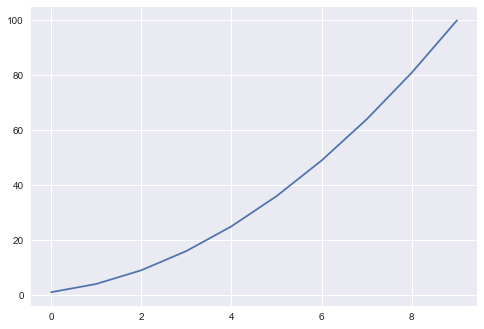

In [39]:
## plot ts2
fig, ax = plt.subplots()
ax.plot(ts2)

For Pandas object, there is an alternative way to do it. Series (and dataframes, as we will see below) have a method **plot** that does the same:

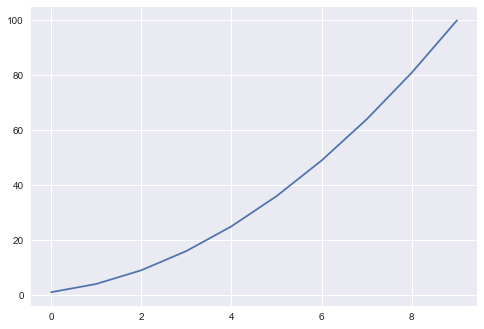

In [40]:
ts2.plot()

This doesn't seem to be very impressive. The next example, however, illustrates the power of Pandas **plot** method. Suppose we want to draw a bar chart that shows the number of championships for the teams in our small data set. We have already defined a series that contains the relevant data, **first**:

In [41]:
print(first)

FC Bayern            8
Borussia Dortmund    2
VfL Wolfsburg        1
VfB Stuttgart        1
dtype: int64


Intuitively, you may want to try the following piece of code to create our bar chart:

In [42]:
## throws an error!
# fig, ax = plt.subplots()
# ax.bar(first.index, first)

This wouldn't work though, as the matplotlib's **bar** method does not accept strings. A work-around here would be to create a series like **first**, but replacing the names of the teams with integer indices:

In [43]:
names = ['VfB Stuttgart', 'FC Bayern', 'VfL Wolfsburg', 'Borussia Dortmund']
ts_num = ts.replace(names, range(0,len(names)))
count = ts_num.value_counts()
print(count)

1    8
3    2
2    1
0    1
dtype: int64


Note that **count** contains the same information as **first**. We can then use the **bar** method; and since we have kept track of which integer refers to which team, we can use the **set_xticklabels** method to disply which bar corresponds to which team:

Text(0.5,1,'Number of Bundesliga Championships Since 2007')

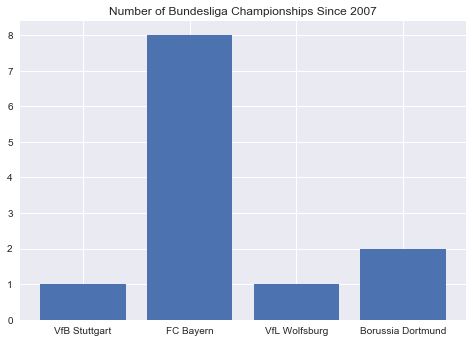

In [44]:
fig, ax = plt.subplots()
ax.bar(count.index, count)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
ax.set_title('Number of Bundesliga Championships Since 2007')

Now here's the awesome thing about Pandas **plot** method: we can do all these steps in one single line, without having to define any additional series:

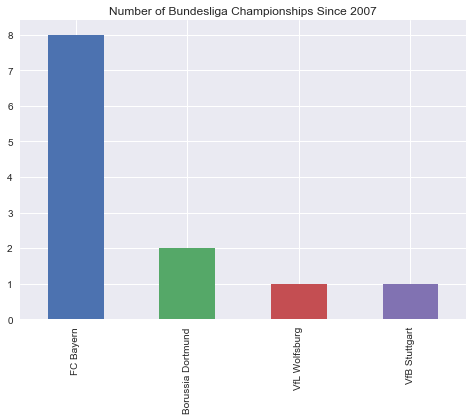

In [45]:
first.plot(kind = 'bar', title = 'Number of Bundesliga Championships Since 2007')

The layout is slightly different of course, but there are many optional arguments for Pandas' **plot** method to tinker around with the looks. Also, note that no matter the type of the graph, we always use the **plot** method, and then indicate what type of graph we want with the **kind** argument. We will see more examples on how to use Pandas' plot method in the context of dataframes below. 

### Reading data from a file

So far, we have created Pandas series by first defining a dictionary or list and then using the **Series** function. Typically, in particular with large data sets, you would load your data from a file (e.g. csv, txt, xls) directly into a Pandas series.

With a csv file, we can do this with the **read_csv** function. Note that this creates a Pandas *DataFrame* rather than a series - the difference will be clear shortly. For now, just take the code below to define a  series **ts** that containes all the Bundesliga champions from the 1963/64 season onwards. We will use this series for the first question in the problem set. 

In [46]:
Df = pd.read_csv('data/champions.csv')
ts = Df['Club'] ## from DataFrame to Series
print(type(ts))

<class 'pandas.core.series.Series'>


In [47]:
print( ts.head() )

1964                1. FC Köln
1965             Werder Bremen
1966          TSV 1860 München
1967    Eintracht Braunschweig
1968            1. FC Nürnberg
Name: Club, dtype: object


In [48]:
print( ts.tail() )

2014    FC Bayern München
2015    FC Bayern München
2016    FC Bayern München
2017    FC Bayern München
2018    FC Bayern München
Name: Club, dtype: object


----------------------------------------------------------------------------------------------------------------------
<a id = "df"></a>

## Pandas DataFrames

A DataFrame is the two-dimensional version of a Pandas array. All of the methods and functions we have seen for series above work also on DataFrames. Let's start by applying **read_csv** to load the data set on Bundesliga players that we have already used in the last lecture.

In [49]:
df = pd.read_csv('data/BundesligaData.csv', sep = ';')

As before, we can use the **head()** method to get a first feel for the data: 

In [50]:
df.head()
# print( df.head() )

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
0,Robert Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3
1,Pierre-Emerick Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3
2,Thomas Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3
3,Marco Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3
4,Douglas Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3


With DataFrames, there are not only row indices, but also keys for each colum, for example **name**, **position**, **value**, etc. in the Bundesliga data set. The **columns** attribute returns the column names as a list: 

In [51]:
df.columns

Index(['name', 'position', 'value', 'valuemax', 'age', 'goals', 'assists',
       'yellow', 'red', 'shotspergame', 'passsuccess', 'aerialswon', 'rating',
       'positioncode'],
      dtype='object')

For DataFrames, there is an additional very useful method, **info()**, for getting an overview over the data set. It lists all the column names, plus the number of elements in each column, as well as their type.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 14 columns):
name            288 non-null object
position        288 non-null object
value           288 non-null float64
valuemax        288 non-null float64
age             288 non-null int64
goals           288 non-null int64
assists         288 non-null int64
yellow          288 non-null int64
red             288 non-null int64
shotspergame    288 non-null float64
passsuccess     288 non-null float64
aerialswon      288 non-null float64
rating          288 non-null float64
positioncode    288 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 31.6+ KB


As with series, the **describe** method gives you some descriptive statistics about the data set, more precisely about each of the columns:

In [53]:
df.describe()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,8.148438,10.734201,25.555556,2.631944,1.875000,2.958333,0.135417,0.987153,75.010417,1.556250,6.816250,2.010417
std,9.820420,11.648733,3.589139,4.034255,2.279663,2.492847,0.381263,0.697538,8.806631,1.123876,0.337366,0.811436
min,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.300000,0.000000,5.950000,1.000000
25%,2.750000,3.500000,23.000000,0.000000,0.000000,1.000000,0.000000,0.500000,69.600000,0.675000,6.590000,1.000000
50%,4.500000,6.250000,26.000000,1.000000,1.000000,2.000000,0.000000,0.900000,75.050000,1.300000,6.820000,2.000000
75%,10.000000,12.625000,28.000000,4.000000,3.000000,4.000000,0.000000,1.400000,81.575000,2.300000,7.032500,3.000000
max,80.000000,80.000000,38.000000,30.000000,18.000000,13.000000,3.000000,4.200000,91.800000,6.000000,8.280000,3.000000


#### Manipulating Columns

Before learning how to access data in a DataFrame, let's first execute some steps that make the data easier to handle. First, note that the player names are given in the format *'firstname lastname'*, which is somewhat inconvenient if, for example, we'd like to sort the data alphabetically.

In [54]:
df.head()

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
0,Robert Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3
1,Pierre-Emerick Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3
2,Thomas Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3
3,Marco Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3
4,Douglas Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3


For a given string, say 'Robert Lewandowski', we can easily write a function that returns a string with first and last name reversed, i.e. 'Lewandowski Robert'. With a **try/except** statement, we can take care of players for which only one name is given, e.g. 'Thiago'.

In [55]:
def reverse_name(name):
    L = name.split(" ")
    try:
        S = L[1] + " " + L[0]
    except:
        S = L[0]
    
    return S

print(reverse_name('Robert Lewandowski'))
print(reverse_name('Thiago'))

Lewandowski Robert
Thiago


How to apply this function on each element in the **name** column? In the previous section, we introduced the **apply** method that does precisely this, for both built-in and your own functions. We can use **apply** on a column in a data set, here to *overwrite* the existing **name** column. 

Individual columns in a DataFrame can be accessed using the familiar bracket operator (note the difference to a Pandas series!).

In [56]:
## use apply method to overwrite name column
df['name'] = df['name'].apply(reverse_name)
df.head()

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
0,Lewandowski Robert,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3
1,Aubameyang Pierre-Emerick,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3
2,Mueller Thomas,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3
3,Reus Marco,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3
4,Costa Douglas,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3


Note that **apply** used on individual columns of a dataframe does not change the array *in place*, i.e. we need to store the result of the operation as the new **name** column.

Similarly easy as overwriting existing columns is adding new columns. As an example, suppose that instead of having one string with a player's last and first name, we'd like to have two separate columns, **name** (containing only the last name) and **first_name**. 

Hence, we first need to split the name strings into two strings. We could use **apply** again, in connection with the **split** method for strings. However, for series or dataframe columns that *contain only strings*, Pandas has a direct way of manipulating strings:

In [57]:
names = df['name'].str.split(expand=True)
names.head()

,0,1
0,Lewandowski,Robert
1,Aubameyang,Pierre-Emerick
2,Mueller,Thomas
3,Reus,Marco
4,Costa,Douglas


As we can see, applying **str.split** creates a new dataframe. Note that the **expand = True** statement is required for having the first and last names in different columns. We can use the first and second column of the **names** DataFrames to overwrite the **name** column in our Bundesliga dataframe, and to add a new **first_name** column, respectively. 

In [58]:
## replace column 'name'
df['name'] = names[0]
## add column 'first name'
df['first_name'] = names[1]

df.head()

,name,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
0,Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3,Robert
1,Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
2,Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
3,Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3,Marco
4,Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3,Douglas


As a side note, for players with only one name, this approach would leave the **first_name** field empty, which is indicated by a "None" when printing the data.

In [59]:
df.iloc[96]  ## Thiago is at index 96 in the data set

name                Thiago
position        midfielder
value                   40
valuemax                40
age                     26
goals                    6
assists                  5
yellow                   4
red                      0
shotspergame           1.3
passsuccess           90.2
aerialswon             1.7
rating                8.28
positioncode             2
first_name            None
Name: 96, dtype: object

#### Setting new indices

Note that the row indices in our Bundesliga dataframe were automatically created from 0 to 288. That can be useful for some applications, but here, assuming we know the player names that we want to get information on, it would be more convenient to have the names as indices. 

This is easy to do by using the **set_index** method: the first argument refers to the column to be used as the new indices, here **'name'**. By setting the optional argument **drop** to **True**, this column is then dropped from the dataframe (which makes sense). Also, make sure to set the optional argument **inplace** to **True** for the change to become effective (this will be required for many Pandas methods).

In [60]:
df.set_index('name', drop = True, inplace = True)
## check if change was successful
df.head()

,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,,
Lewandowski,striker,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3,Robert
Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3,Marco
Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3,Douglas


#### Accessing elements in dataframes

In the previous sections, we have already seen that using the bracket operator with a dataframe accesses a column (rather than a row as with a Pandas series). If you provide an argument that does not refer to a column in the dataframe, you get an error.

In [61]:
## print name column
print( df['value'] )

name
Lewandowski    80.00
Aubameyang     65.00
Mueller        60.00
Reus           40.00
Costa          30.00
Dembele        28.00
Schuerrle      23.00
Chicharito     22.00
Embolo         20.00
Coman          20.00
Modeste        17.00
Volland        17.00
Werner         16.00
Forsberg       15.00
Stindl         13.00
Bailey         12.50
Konoplyanka    12.00
Pulisic        12.00
Robben         10.00
Sabitzer       10.00
Ntep           10.00
Kostic         10.00
Burke          10.00
Kramaric        9.00
Kruse           8.00
Krkic           8.00
Maxim           8.00
Gomez           7.50
Raffael         7.00
Philipp         7.00
               ...  
Toljan          3.50
Schaer          3.50
Kempf           3.50
Langkamp        3.00
Maroh           3.00
Wollscheid      3.00
Oczipka         3.00
Badstuber       3.00
Caldirola       3.00
Sakai           3.00
Tisserand       3.00
Klostermann     3.00
Passlack        3.00
Guenter         2.75
Russ            2.50
Aogo            2.50
Naldo   

In [62]:
## the following returns an error, since we have dropped the 'name' column above!!!
# print( df['name'] )

The **loc** and **iloc** methods that we have seen for series also work with dataframes. As with a series, **loc** uses row indices and now also column keys. **iloc** uses the actual position of the row(s) and the column(s) that you'd like to access. 

As an example, suppose we want to print the **'value'** (the column key) of the first player in the dataframe, which we know refers to **'Lewandowski'** (the row index). The following two statements are then equivalent:

In [63]:
## access an element in the dataframe using loc
print( df.loc['Lewandowski', 'value'] )
## access an element in the dataframe using iloc
print( df.iloc[0, 1] )

80.0
80.0


For **iloc** to work here, of course we need to know the row and column position of the element we're interested in, here **0, 1**. 

While this works fine, note that you can also use the bracket operator together with **loc** or **iloc**. As before, the argument given to the bracket operator will refer to the column key; the argument given to **loc** or **iloc** then refers to the row index or row position, respectively. Hence, the example above can also be implemented like this:

In [64]:
## access an element in the dataframe using the bracket operator and loc
print( df['value'].loc['Lewandowski'] )
## access an element in the dataframe using the bracket operator and iloc
print( df['value'].iloc[0] )

80.0
80.0


As an aside, what will not work is giving the column key to both the bracket operator and **loc** or **iloc**:

In [65]:
## the following would have too many indices, and hence return errors
# print( df['value'].loc['Lewandowski', 'value'] )
# print( df['value'].iloc[0, 1] )

When using **loc** or **iloc** with only one argument, it returns the whole row referring to this index or position (assuming that it exists):

In [66]:
print( df.loc['Lewandowski'] )

position        striker
value                80
valuemax             80
age                  28
goals                30
assists               4
yellow                5
red                   0
shotspergame        4.2
passsuccess          75
aerialswon          1.8
rating             7.71
positioncode          3
first_name       Robert
Name: Lewandowski, dtype: object


#### Accessing Multiple Elements

As with Pandas series, the **loc** and **iloc** methods allow you to access multiple elements, with the usual slicing notation: 

In [67]:
## print the values for the first 10 players
print( df['value'].iloc[:10] )

name
Lewandowski    80.0
Aubameyang     65.0
Mueller        60.0
Reus           40.0
Costa          30.0
Dembele        28.0
Schuerrle      23.0
Chicharito     22.0
Embolo         20.0
Coman          20.0
Name: value, dtype: float64


In [68]:
## print the first names for Lewandowski to Costa
print( df['first_name'].loc['Lewandowski' : 'Costa'] )

name
Lewandowski            Robert
Aubameyang     Pierre-Emerick
Mueller                Thomas
Reus                    Marco
Costa                 Douglas
Name: first_name, dtype: object


In [69]:
## print the age, goals and assists for Lewandowski to Costa
print( df.loc['Lewandowski' : 'Costa', 'age' : 'assists'] )

             age  goals  assists
name                            
Lewandowski   28     30        4
Aubameyang    27     29        2
Mueller       27      5       12
Reus          27      5        4
Costa         26      4        3


Note from the last two examples that slicing (that we have seen so far only with integers) works also for row indices and column keys using **loc**. However, what might be a bit confusing here: when slicing with **loc**, the last element given in your slice (**'Costa'** in the example above) is *included* in what is returned. Recall from lists, Numpy arrays etc. that slicing usually returns the elements *excluding the last one given*. In fact this is also true when using **iloc**:

In [70]:
print( df.iloc[0:5, 3:6] )

             age  goals  assists
name                            
Lewandowski   28     30        4
Aubameyang    27     29        2
Mueller       27      5       12
Reus          27      5        4
Costa         26      4        3


As second thing to keep in mind for slicing: when slicing over column keys, you need to give the keys to as an argument to **loc**; the bracket operator will not work:

In [71]:
## the following will throw an error, as slicing in the bracket operator does not work
# print( df['age' : 'assists'].loc['Lewandowski' : 'Costa'] )

When accessing multiple elements, they don't have to be adjacent: you can use arrays containing the indices or keys of the elements:

In [72]:
print( df.loc[('Lewandowski', 'Costa'), ('age','assists')] )

             age  assists
name                     
Lewandowski   28        4
Costa         26        3


In [73]:
players = ['Reus', 'Thiago', 'Forsberg', 'Rudy']
print( df.loc[players, ('age','first_name')] )

          age first_name
name                    
Reus       27      Marco
Thiago     26       None
Forsberg   25       Emil
Rudy       27  Sebastian


#### Logical Arrays

As we saw for Pandas series, we can use logical arrays (containing only **True** and **False**) to access elements in a dataframe. For example, suppose we are interested in number of goals scored by defenders only (indicated by a '1' for **'positioncode'** in the data set). The following returns a Pandas series assigning **True** or **False** to each index.

In [74]:
df['positioncode'] == 1

name
Lewandowski    False
Aubameyang     False
Mueller        False
Reus           False
Costa          False
Dembele        False
Schuerrle      False
Chicharito     False
Embolo         False
Coman          False
Modeste        False
Volland        False
Werner         False
Forsberg       False
Stindl         False
Bailey         False
Konoplyanka    False
Pulisic        False
Robben         False
Sabitzer       False
Ntep           False
Kostic         False
Burke          False
Kramaric       False
Kruse          False
Krkic          False
Maxim          False
Gomez          False
Raffael        False
Philipp        False
               ...  
Toljan          True
Schaer          True
Kempf           True
Langkamp        True
Maroh           True
Wollscheid      True
Oczipka         True
Badstuber       True
Caldirola       True
Sakai           True
Tisserand       True
Klostermann     True
Passlack        True
Guenter         True
Russ            True
Aogo            True
Naldo   

We can use such an array directly as an argument in the **loc** method:

In [75]:
print( df['goals'].loc[ df['positioncode'] == 1 ] )

name
Boateng        0
Alaba          4
Hummels        1
Sokratis       2
Martinez       1
Tah            1
Sle            2
Hoewedes       1
Toprak         1
Hector         0
Guerreiro      6
Rodriguez      2
Bernat         2
Christensen    2
Dragovic       0
Ginter         0
Nastasic       0
Wendell        2
Gerhardt       0
Lahm           1
Bruma          1
Vestergaard    4
Anthony        2
Henrichs       0
Schmelzer      0
Kolasinac      3
Weiser         1
Hinteregger    3
Bartra         0
Stark          1
              ..
Toljan         1
Schaer         0
Kempf          0
Langkamp       0
Maroh          0
Wollscheid     0
Oczipka        1
Badstuber      0
Caldirola      0
Sakai          1
Tisserand      0
Klostermann    0
Passlack       0
Guenter        0
Russ           0
Aogo           0
Naldo          1
Mavraj         0
Trsch          0
Brosinski      1
Chandler       0
Pekark         1
Ostrzolek      1
Bauer          1
Hadergjonaj    1
Bicakcic       1
Gebre          5
Garcia   

If we are also interested in assists, we need to specify the column names inside **loc**, as before:

In [76]:
df.loc[ df['positioncode'] == 1, ('goals', 'assists')].head()

,goals,assists
name,,
Boateng,0,1
Alaba,4,4
Hummels,1,1
Sokratis,2,0
Martinez,1,1


We will see more examples on how to use logical arrays for indexing below.

#### Descriptive Statistics

For numerical data, the **describe** method gives an overview over the most common descriptive statistics. In addition, the same methods that we saw when learning about Numpy arrays work for Pandas as well. Consider the **mean** method:

In [77]:
print( df.mean() )
print('')
print( type(df.mean()))

value            8.148438
valuemax        10.734201
age             25.555556
goals            2.631944
assists          1.875000
yellow           2.958333
red              0.135417
shotspergame     0.987153
passsuccess     75.010417
aerialswon       1.556250
rating           6.816250
positioncode     2.010417
dtype: float64

<class 'pandas.core.series.Series'>


Note two things: first, the **mean** method (as well as the other methods for descriptive statistics) ignores columns that contain non-numerical values (i.e. whose **dtype** is "object"). In the Bundesliga data set, **'position'** and **'first_name'** are ignored, since they contain strings. 

Second, calling **mean** without an argument returns the averages for each column, across all rows, in a Pandas series. If we want to get the average for all rows instead, we can use the **axis = 1** as an argument - 1 since we average *across all columns*. Of course, this does not make much sense in the Bundesliga example, but just for illustration:

In [78]:
print( df.mean(axis = 1) )

name
Lewandowski    26.559167
Aubameyang     23.050000
Mueller        22.458333
Reus           17.944167
Costa          16.030833
Dembele        14.834167
Schuerrle      14.249167
Chicharito     14.493333
Embolo         12.326667
Coman          13.350000
Modeste        14.545000
Volland        12.834167
Werner         13.674167
Forsberg       14.335833
Stindl         14.114167
Bailey         10.167500
Konoplyanka    12.910000
Pulisic        11.386667
Robben         16.444167
Sabitzer       11.513333
Ntep           10.321667
Kostic         10.941667
Burke          10.595000
Kramaric       13.641667
Kruse          13.375833
Krkic          11.832500
Maxim          11.838333
Gomez          15.095000
Raffael        12.090833
Philipp        11.323333
                 ...    
Toljan          9.820000
Schaer         10.954167
Kempf           9.966667
Langkamp       11.505000
Maroh          11.113333
Wollscheid     11.438333
Oczipka        10.827500
Badstuber      12.899167
Caldirola       9.48

Methods for the computing the standard deviation (**std**), variance (**var**), median (**median**), maximum (**max**), minimum (**min**), as well as for taking the sum (**sum**) and counting the elements (**count**) work accordingly.

In [79]:
print( df.std() )

value            9.820420
valuemax        11.648733
age              3.589139
goals            4.034255
assists          2.279663
yellow           2.492847
red              0.381263
shotspergame     0.697538
passsuccess      8.806631
aerialswon       1.123876
rating           0.337366
positioncode     0.811436
dtype: float64


In [80]:
print( df.median() )

value            4.50
valuemax         6.25
age             26.00
goals            1.00
assists          1.00
yellow           2.00
red              0.00
shotspergame     0.90
passsuccess     75.05
aerialswon       1.30
rating           6.82
positioncode     2.00
dtype: float64


Unsurprisingly, using these methods on a column or a row just returns a scalar:

In [81]:
df['value'].max()

80.0

We can combine these methods with logical arrays to compute statistics for subgroups in the data. For example, let's see if there are differences in the rating of different age groups. Below, we first count the number of players that below 25, over 30 or in between, and then compute their average rating. 

In [82]:
print(df.loc[df['age'] < 25, 'rating'].count() )
print(df.loc[df['age'] < 25, 'rating'].mean()  ) 

113
6.776371681415927


In [83]:
print( df.loc[df['age'] > 30, 'rating'].count() )
print( df.loc[df['age'] > 30, 'rating'].mean() )

23
6.894782608695651


In [84]:
A = (df['age'] >= 25) & (df['age'] <= 30)
print(df.loc[A, 'rating'].count() )
print(df.loc[A, 'rating'].mean()  )

152
6.834013157894733


Note that for the group between 25 and 30, we can use a **&** to link two logical expressions. Unsurprisingly, compared to the younger age groups, there are by far fewer players of age 31 and older in the data set. However, their average rating does not seem significantly different from younger players - in fact it is slightly higher. Of course, this is most likely driven by some outliers - and may look a bit different after next season!

Another very useful method is **idxmax**, which returns the row index of the element that achieves the highest value in a column: 

In [85]:
print( df['goals'].idxmax() )

Lewandowski


We can also use **idxmax** on the whole dataframe; however, this works only when the dataframe contains only numbers. Let's get back to this below.

Using **loc**, we can also use the result from an **idxmax** call for accessing elements. For examples, let's see the position of the players with the most goals, most assists, best rating and highest market value, respectively:

In [86]:
print( df['position'].loc[df['goals'].idxmax()] )
print( df['position'].loc[df['assists'].idxmax()] )
print( df['position'].loc[df['rating'].idxmax() ] )
print( df['position'].loc[df['value'].idxmax()] )

striker
striker
midfielder
striker


We can also combine **idxmax** with logical indexing, for example to find the best goal scorers for each position. The code below tells Python to print the index for the element that attains the highest value in the **'goals'** column, among all the elements that a **1** (or **2**, or **3**) in the column **'positioncode'**.

In [87]:
## most goals at their position
print( df.loc[ df['positioncode'] == 1, 'goals' ].idxmax()  )
print( df.loc[ df['positioncode'] == 2, 'goals' ].idxmax()  )
print( df.loc[ df['positioncode'] == 3, 'goals' ].idxmax()  )

Guerreiro
Gnabry
Lewandowski


#### apply vs. applymap

Two methods for Pandas dataframes that can be very useful are **apply** and **applymap**. For reasons that will become clear momentarily, start by creating a new dataframe **df_num** that contains all the columns from the original dataframe with only numerical data: 

In [88]:
## preparation: define df with numbers only
df_num = df.loc[:, 'value': 'positioncode']
df_num.head()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
name,,,,,,,,,,,,
Lewandowski,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3
Aubameyang,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3
Mueller,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3
Reus,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3
Costa,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3


**applymap** does for dataframes what **apply** did for series (as seen above): it takes a function (built-in or newly written) and applies it to each element in the dataframe. Let's use **int** again as an example, i.e. let's convert all numbers in **df_num** to integers: 

In [89]:
df_num.applymap(int).head()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
name,,,,,,,,,,,,
Lewandowski,80,80,28,30,4,5,0,4,75,1,7,3
Aubameyang,65,65,27,29,2,3,0,3,70,1,7,3
Mueller,60,75,27,5,12,0,0,2,76,1,7,3
Reus,40,50,27,5,4,1,1,2,74,0,7,3
Costa,30,35,26,4,3,2,0,1,80,0,7,3


At this point, it may become clear why we had to create a new dataframe with numerical data only: **applymap()** requires that it can use the function on all elements in the dataframe, otherwise it will throw an error. Since **int** cannot be applied on strings, the operation above would not have worked with the original dataframe.

While **applymap()** applies a function on each element in the dataframe, **apply()** operates on *columns* in a dataframe. As an example, suppose we want to find the element that gets the second-highest value in a column or series. We can write a function **second_largest_series** to achieve this, using a combination of logical array and **idxmax()**. We can then use **apply** to apply this function on the dataframe.

In [90]:
def second_largest_series(series):
    s_max = series.max()
    return series[ series < s_max ].idxmax()

df_num.apply(second_largest_series)

value           Aubameyang
valuemax           Mueller
age                 Alonso
goals           Aubameyang
assists            Mueller
yellow            Bentaleb
red                 Leckie
shotspergame    Aubameyang
passsuccess       Martinez
aerialswon      Wollscheid
rating            Forsberg
positioncode        Thiago
dtype: object

In these examples, **apply** takes all the elements in a column and returns a single value, e.g. the maximizing index. A second way to use **apply** is to return a value for each element in a column, but using all elements in a column to compute this value. 

As an example, assume you want to see whether an element in the Bundesliga data set is above or below the relevant mean, i.e. the mean across all observations. 

Below we write a function **top_or_flop** that makes a copy of a series or a column, and replaces each element with **"Top"** if it is above the mean, and **"Flop"** if it is below the mean. We can apply this function to the dataframe. Note that **applymap** would not work here, since we need the function to operate on the whole column, in order to find the mean: 

In [91]:
def top_or_flop(s):
    q = s.copy()
    q.loc[ s >= s.mean()] = "Top"
    q.loc[ s < s.mean()] = "Flop"
    return q

In [92]:
df_num.apply(top_or_flop)

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode
name,,,,,,,,,,,,
Lewandowski,Top,Top,Top,Top,Top,Top,Flop,Top,Flop,Top,Top,Top
Aubameyang,Top,Top,Top,Top,Top,Top,Flop,Top,Flop,Flop,Top,Top
Mueller,Top,Top,Top,Top,Top,Flop,Flop,Top,Top,Top,Top,Top
Reus,Top,Top,Top,Top,Top,Flop,Top,Top,Flop,Flop,Top,Top
Costa,Top,Top,Top,Top,Top,Flop,Flop,Top,Top,Flop,Top,Top
Dembele,Top,Top,Flop,Top,Top,Top,Flop,Top,Flop,Flop,Top,Top
Schuerrle,Top,Top,Top,Flop,Top,Top,Flop,Top,Flop,Flop,Top,Top
Chicharito,Top,Top,Top,Top,Top,Flop,Flop,Top,Flop,Flop,Top,Top
Embolo,Top,Top,Flop,Flop,Flop,Flop,Flop,Top,Flop,Flop,Top,Top


Importantly, changes to dataframes using **apply** or **applymap** are not implemented *in place*, i.e. you need to overwrite the dataframe or store the result of the operation in a new dataframe in order to make the changes effective.

Finally, as mentioned above, we can use **idxmax()** on the whole dataframe **df_num**, since it contains only numbers:

In [93]:
df_num.idxmax()

value           Lewandowski
valuemax        Lewandowski
age                 Pizarro
goals           Lewandowski
assists            Forsberg
yellow            Mascarell
red                  Gbamin
shotspergame    Lewandowski
passsuccess            Vogt
aerialswon           Caiuby
rating               Thiago
positioncode    Lewandowski
dtype: object

#### Other Useful Methods

##### drop

As the name indicates, you can use the **drop** method with a row index as to delete the corresponding row:

In [94]:
df.drop('Lewandowski').head()

,position,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,,
Aubameyang,striker,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
Mueller,striker,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
Reus,striker,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3,Marco
Costa,striker,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3,Douglas
Dembele,striker,28.0,28.0,20,6,11,6,0,1.6,66.8,0.2,7.41,3,Ousmane


You can also use **drop** to erase a column; in this case you need to set the axis argument to 1:

In [95]:
df.drop('red', axis = 1).head()

,position,value,valuemax,age,goals,assists,yellow,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,
Lewandowski,striker,80.0,80.0,28,30,4,5,4.2,75.0,1.8,7.71,3,Robert
Aubameyang,striker,65.0,65.0,27,29,2,3,3.6,70.3,1.3,7.40,3,Pierre-Emerick
Mueller,striker,60.0,75.0,27,5,12,0,2.2,76.2,1.8,7.30,3,Thomas
Reus,striker,40.0,50.0,27,5,4,1,2.3,74.6,0.4,7.03,3,Marco
Costa,striker,30.0,35.0,26,4,3,2,1.9,80.2,0.1,7.17,3,Douglas


Note from these examples that the changes to **df** are not saved. As before, you need to set **inplace = True** in order to make the effects of using **drop()** permanent:

In [96]:
df.drop('position', axis = 1, inplace = True)
df.head()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,
Lewandowski,80.0,80.0,28,30,4,5,0,4.2,75.0,1.8,7.71,3,Robert
Aubameyang,65.0,65.0,27,29,2,3,0,3.6,70.3,1.3,7.40,3,Pierre-Emerick
Mueller,60.0,75.0,27,5,12,0,0,2.2,76.2,1.8,7.30,3,Thomas
Reus,40.0,50.0,27,5,4,1,1,2.3,74.6,0.4,7.03,3,Marco
Costa,30.0,35.0,26,4,3,2,0,1.9,80.2,0.1,7.17,3,Douglas


##### Sorting

**sort_index()** sorts the dataframes using its row indices; in our example, the row indices are strings, hence the rows are sorted alphabeticaly: 

In [97]:
df.sort_index(inplace = True)
df.head()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,
Abraham,4.0,4.0,30,1,2,5,1,0.5,83.0,2.9,7.07,1,David
Abrashi,2.5,2.5,27,1,0,3,0,0.5,77.0,1.6,6.60,2,Amir
Alaba,40.0,45.0,24,4,4,1,0,1.0,88.3,0.7,7.15,1,David
Alonso,3.5,35.0,35,3,1,6,0,0.9,89.3,1.6,7.20,2,Xabi
Amiri,7.0,7.0,20,2,4,2,0,1.4,83.6,0.3,6.74,2,Nadiem


If you want to sort the dataframe according to the values in a column, use **sort_values()**, with the column key as the arguement. As before, set **inplace = True** to save the change:

In [98]:
df.sort_values('age', inplace = True)
df.head()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,
Havertz,5.0,5.0,17,2,5,2,0,1.2,72.9,3.6,6.86,2,Kai
Osimhen,1.0,1.0,18,0,0,1,0,1.0,72.7,1.0,6.26,3,Victor
Passlack,3.0,3.0,18,0,0,1,0,0.3,89.6,0.4,6.62,1,Felix
Pulisic,12.0,12.0,18,3,6,1,0,1.0,73.1,0.7,6.84,3,Christian
Upamecano,5.0,5.0,18,0,0,3,0,0.1,77.3,2.8,6.78,1,Dayot


The default way of sorting is in ascending order; you can set the **ascending** argument to **False** in order to sort the dataframe in descending order:

In [99]:
df.sort_values('age', ascending = False, inplace = True)
df.head()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating,positioncode,first_name
name,,,,,,,,,,,,,
Pizarro,1.0,12.5,38,1,1,1,0,1.1,65.6,1.6,6.51,3,Claudio
Alonso,3.5,35.0,35,3,1,6,0,0.9,89.3,1.6,7.20,2,Xabi
Ribery,8.0,50.0,34,4,11,2,0,1.0,83.7,0.4,7.39,2,Franck
Meier,2.0,4.5,34,5,2,1,0,2.1,65.0,3.4,6.78,3,Alexander
Naldo,2.5,12.5,34,1,0,1,1,1.4,85.1,3.4,7.25,1,None


##### groupby

Above, we were using logical expressions to find the top goal scorers for each position. An alternative way to get statistics for a subset of the data is the **groupby()** method. Below, we group the Bundesliga data according to the column **'positioncode'**:

In [100]:
grouped_pos = df.groupby('positioncode')
print(type(grouped_pos))

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


The resulting object is a special Pandas object; we can apply the same methods on it as for regular dataframes, e.g. **mean()**:

In [101]:
grouped_pos.mean()

,value,valuemax,age,goals,assists,yellow,red,shotspergame,passsuccess,aerialswon,rating
positioncode,,,,,,,,,,,
1,8.123656,10.419355,25.440860,0.978495,1.118280,3.430108,0.107527,0.560215,78.470968,2.019355,6.907419
2,7.911616,10.322727,25.606061,2.030303,2.141414,3.313131,0.151515,0.938384,77.601010,1.195960,6.839596
3,8.416667,11.463542,25.614583,4.854167,2.333333,2.135417,0.145833,1.451042,68.986458,1.479167,6.703854


Hence, the method is applied on each of the (here three) subgroups, rather than on the whole data set. Similarly, we can use the **idxmax()** method on the groupby object to get the top goal scorers for each position:

In [102]:
grouped_pos['goals'].idxmax()

positioncode
1      Guerreiro
2         Gnabry
3    Lewandowski
Name: goals, dtype: object

##### isnull, any, all

Recall that above we added a column **first_name** to the data set. Since some players only use one name, this field was left empty for those players. Printing such a field would give **None**:

In [103]:
print( df.loc['Naldo', 'first_name'] ) 

None


This is an example of missing values in a Pandas series or dataframe. In this case, the missing values are intended, but often they are not. Pandas objects have a method called **isnull** that lets you check for missing data, returning a **True** whenever it detects a **None**. For example, applying **isnull** on the **first_name** column gives:

In [104]:
df['first_name'].isnull()

name
Pizarro           False
Alonso            False
Ribery            False
Meier             False
Naldo              True
Hasebe            False
Robben            False
Kiessling         False
Huntelaar         False
Lahm              False
Ibisevic          False
Raffael            True
Baier             False
Blaszczykowski    False
Polanski          False
Kalou             False
Piszczek          False
Vieirinha          True
Wendt             False
Rafinha            True
Heller            False
Gomez             False
Russ              False
Hartmann          False
Hunt              False
San               False
Frantz            False
Bartels           False
Aogo              False
Coke               True
                  ...  
Werner            False
Stendera          False
Oeztunali         False
Tah               False
Dahoud            False
Coman             False
Christiansen      False
Waldschmidt       False
Vallejo           False
Elvedi            False
Merino     

**isnull** detects **None**, as well as the Python implementation of 'NaN' ("not a number"):

In [105]:
df.loc['Naldo', 'first_name'] = float('NaN')
print( df.loc['Naldo', 'first_name'] )
df.loc['Naldo'].isnull() 

nan


value           False
valuemax        False
age             False
goals           False
assists         False
yellow          False
red             False
shotspergame    False
passsuccess     False
aerialswon      False
rating          False
positioncode    False
first_name       True
Name: Naldo, dtype: bool

Note however that (somewhat obviously) 0 does not count as a missing value:

In [106]:
df.loc['Naldo', 'first_name'] = 0
print( df.loc['Naldo', 'first_name'] )
df.loc['Naldo'].isnull() 

0


value           False
valuemax        False
age             False
goals           False
assists         False
yellow          False
red             False
shotspergame    False
passsuccess     False
aerialswon      False
rating          False
positioncode    False
first_name      False
Name: Naldo, dtype: bool

As these examples show, **isnull** works element-wise, i.e. returns a series or dataframes (filled with booleans) of the same dimension as the series or dataframe you apply it on. You can combine **isnull** with the **any** method to check whether there are missing values in a Pandas object, without going through every element. 

**any()** used on a dataframe checks for each column whether it contains *any* booleans that evaluate to **True**, and assigns a **True** to this column if that is the case (and **False** otherwise).

In [107]:
df.isnull().any()

value           False
valuemax        False
age             False
goals           False
assists         False
yellow          False
red             False
shotspergame    False
passsuccess     False
aerialswon      False
rating          False
positioncode    False
first_name       True
dtype: bool

As with **mean()** and similar methods, you can apply **any** on rows, using the **axis = 1** argument:

In [108]:
df.isnull().any(axis = 1)

name
Pizarro           False
Alonso            False
Ribery            False
Meier             False
Naldo             False
Hasebe            False
Robben            False
Kiessling         False
Huntelaar         False
Lahm              False
Ibisevic          False
Raffael            True
Baier             False
Blaszczykowski    False
Polanski          False
Kalou             False
Piszczek          False
Vieirinha          True
Wendt             False
Rafinha            True
Heller            False
Gomez             False
Russ              False
Hartmann          False
Hunt              False
San               False
Frantz            False
Bartels           False
Aogo              False
Coke               True
                  ...  
Werner            False
Stendera          False
Oeztunali         False
Tah               False
Dahoud            False
Coman             False
Christiansen      False
Waldschmidt       False
Vallejo           False
Elvedi            False
Merino     

Since applying **any()** on a series returns a scalar **True** or **False**, applying **any()** twice on a dataframe indicates whether there is any missing data:

In [109]:
df.isnull().any().any()

True

Finally, **all()** works similar to **any()**, but returns **True** if only *all* elements in a series or dataframe column evaluate to **True**:

In [110]:
df.isnull().all()

value           False
valuemax        False
age             False
goals           False
assists         False
yellow          False
red             False
shotspergame    False
passsuccess     False
aerialswon      False
rating          False
positioncode    False
first_name      False
dtype: bool

#### Plotting

As with series, creating graphs is facilitated by Pandas' **plot** method. Let's plot the player's market value first; note that above, we have sorted the data set according to age, and hence the x-axis in the figure below starts with the oldest player ('Pizarro'):

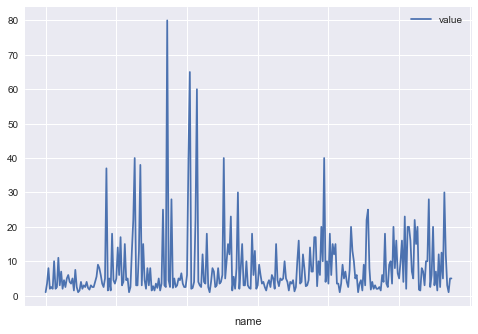

In [111]:
df.plot(y ='value')

Also note that only certain player indices are used for ticks on the x-axis; again, there are many ways to tweak the layout of these graphs. 

We can also plot two columns of the data set in one picture; for this, we first define **fig** and **ax** objects (like seen in the last lecture) and then add the two plots to the **ax** canvas:

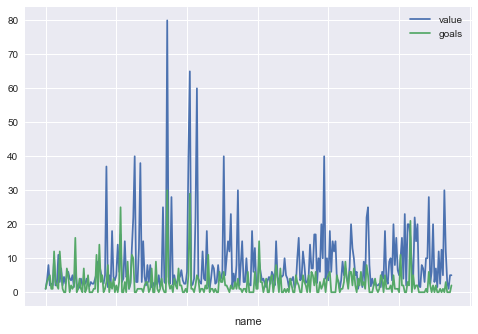

In [112]:
fig, ax = plt.subplots()
df.plot(y ='value', ax = ax)
df.plot(y ='goals', ax = ax)

If we want to create separate plots for subgroups, we can use **plot** directly on a **groupby** object:

positioncode
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

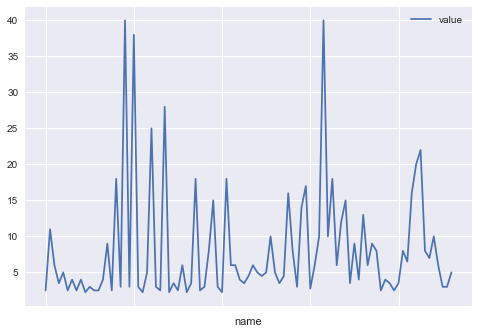

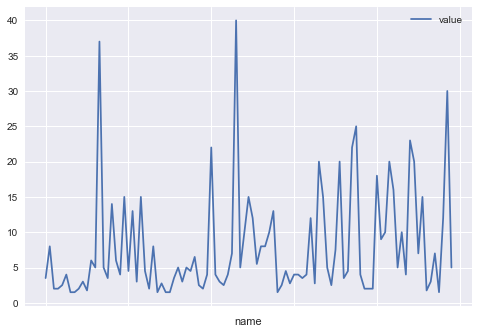

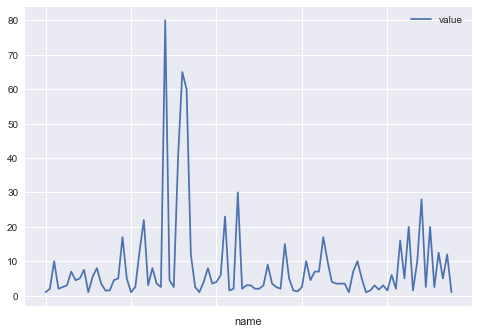

In [113]:
df.groupby('positioncode').plot(y ='value')

We can also create other types of plots. Say we are interested how age and number of goals affect a player's market value. As seen in the last lecture, a scatter plot is a nice way to visualize this:

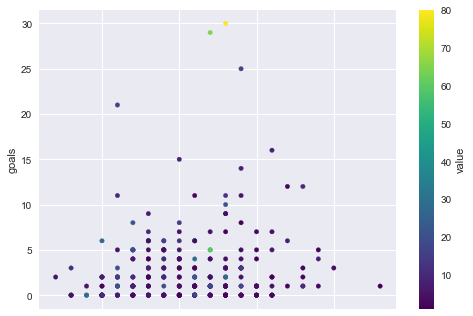

In [114]:
df.plot('age', 'goals', kind='scatter', c = 'value', colormap = 'viridis')

----------------------------------------------------------------------------------------------------------------------
<a id = "stats"></a>

## Running Regressions: Statsmodels

Pandas by itself does allow data analysis to the extent of descriptive statistics. For regressions analysis, you can combine it with another model, *statsmodel*. We use the following import statement: 

In [115]:
import statsmodels.api as sm

This package has a class, **OLS**, which takes data on dependent and explanatory variables and then uses its **fit()** method to perform ordinary least squares regression. 

In [116]:
## define regression matrix
X = df['goals']
y = df['value']

## add constant
X = sm.add_constant(X)
## OLS 
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     63.99
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           3.14e-14
Time:                        11:08:36   Log-Likelihood:                -1037.0
No. Observations:                 288   AIC:                             2078.
Df Residuals:                     286   BIC:                             2085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4090      0.626      8.641      0.0

There is a second way of using the statsmodel module for running regressions, which is faster and more elegant, and works great with Pandas dataframes:

In [117]:
import statsmodels.formula.api as sm2
res = sm2.ols(formula = "value ~ goals", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     63.99
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           3.14e-14
Time:                        11:08:36   Log-Likelihood:                -1037.0
No. Observations:                 288   AIC:                             2078.
Df Residuals:                     286   BIC:                             2085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4090      0.626      8.641      0.0

Consider a more elaborate model: 

In [118]:
import statsmodels.formula.api as sm2
res = sm2.ols(formula = "value ~ goals + age + passsuccess + aerialswon", data = df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     36.92
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           7.79e-25
Time:                        11:08:36   Log-Likelihood:                -1005.6
No. Observations:                 288   AIC:                             2021.
Df Residuals:                     283   BIC:                             2040.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -15.4280      5.207     -2.963      

## Other Topics in Data Analysis

Due to time constraints, there are a lot of topics and useful packages in the context of data analysis that we did not cover in this lecture. Among them:
- three-dimensional Pandas dataframes (Multiindex)
- Scipy stats package
